In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Nepali_Dataset_New.csv',encoding ='utf-8')

In [4]:
df.head()

,News,Category
0,"\n﻿काठमाण्डौ, ६ असार । नेपाल ललितकला प्रज्ञा प...",politics
1,नेपालको आशा जीवितैकप्तान पारस खड्काले ब्याट र ...,sport
2,"\n﻿राजविराज, २६ फागुन । नेकपा एमालेलाई औद्योगि...",politics
3,"सामाजिक कार्यका लागि सुन्दरी""\nसौन्दर्य प्रतिय...",entertainment
4,"खराब प्रदर्शनपछि प्रशिक्षण पिच""महिला राष्ट्रिय...",sport


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   News      4540 non-null   object
 1   Category  4540 non-null   object
dtypes: object(2)
memory usage: 71.1+ KB


In [6]:
df.isna().sum()

News        0
Category    0
dtype: int64

In [7]:
df.duplicated().sum()

4

In [8]:
df=df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Category'].unique()

array(['politics', 'sport', 'entertainment', 'tech', 'business'],
      dtype=object)

In [11]:
y= df['Category']

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

print("Categories before label encoding in y:")
print(set(y))

# Encode the categorical labels into numerical format
y = label_encoder.fit_transform(y)

print("Categories after label encoding in y:")
print(set(y))

Categories before label encoding in y:
{'tech', 'business', 'entertainment', 'politics', 'sport'}
Categories after label encoding in y:
{0, 1, 2, 3, 4}


In [13]:
import re
 
def clean_text(string):
    if isinstance(string, str):
        clean_text = re.sub(r'[\n,|।\'":]', '', string)
        return clean_text
    else:
        return string # Return the input unchanged if it's not a string

In [14]:
df['News'] = df['News'].apply(clean_text)

In [15]:
import snowballstemmer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'nepali' has stop words list
stop_words = set(stopwords.words('nepali'))  

# Create an instance of the Stem class
# stemmer = Stem()
stemmer = snowballstemmer.NepaliStemmer()

def tokenize_and_stem(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        stemmed = stemmer.stemWords(tokens)

        return ' '.join(stemmed)
    else:
        return []

# Applying the tokenization and stemming function to each element in DataFrame 'X'
X = df['News'].apply(lambda x: tokenize_and_stem(x))

In [16]:
print(stop_words)

{'भए', 'धेरै', 'चाहनुहुन्छ', 'पर्याप्त', 'पहिले', 'दोस्रो', 'यसरी', 'हरे', 'सट्टा', 'गर्छ', 'शायद', 'अर्थात', 'बारे', 'अन्यथा', 'जो', 'ओठ', 'यदि', 'कसै', 'अगाडी', 'पक्का', 'तेस्कारण', 'यथोचित', 'यसबाहेक', 'भन्छु', 'देखेर', 'प्रति', 'दिए', 'भन्', 'पछि', 'पाँच', 'भन्छन्', 'अन्यत्र', 'हुन्', 'जताततै', 'नै', 'साथ', 'छन्', 'गर्दै', 'अनुसार', 'आयो', 'किनभने', 'अन्तर्गत', 'भित्री', 'बीचमा', 'वरीपरी', 'गर्ने', 'त्यो', 'साँच्चै', 'बिशेष', 'कृपया', 'पर्थ्यो', 'चाले', 'सात', 'गर्छु', 'कुरा', 'ती', 'अझै', 'जहाँ', 'सधै', 'तीन', 'छैन', 'गर्न', 'कहाँबाट', 'कोही', 'भन्नुभयो', 'साथै', 'ले', 'गैर', 'तेस्रो', 'छ', 'गरेर', 'लागि', 'आत्म', 'चाहन्छु', 'थिएन', 'यद्यपि', 'वास्तवमा', 'देखि', 'हुने', 'तत्काल', 'नत्र', 'छु', 'यसपछि', 'एक', 'अन्य', 'बीच', 'पटक', 'समय', 'उहालाई', 'तिर', 'ठीक', 'हुन्छ', 'जसमा', 'रूप', 'यति', 'त', 'के', 'जबकि', 'राख्छ', 'नजिकै', 'गयौ', 'सक्छ', 'यसो', 'तर', 'त्यहाँ', 'आफूलाई', 'त्सपछि', 'नि', 'कतै', 'जब', 'मा', 'को', 'हुन', 'पहिल्यै', 'देखे', 'अलग', 'पनि', 'आफ्नै', 'तिनीहरुको', 'हरेक

In [17]:
X.head()

0    ﻿काठमाण्डौ ६ असार नेपाल ललितकला प्रज्ञा प्रतिष...
1    नेपाल आशा जीवितैकप्तान पारस खड्का ब्याट शक्ति ...
2    ﻿राजविराज २६ फागुन नेकपा एमाले औद्योगिक क्षेत्...
3    सामाजिक कार्य सुन्दरीसौन्दर्य प्रतियोगिता दौड ...
4    खराब प्रदर्शन प्रशिक्षण पिचमहिला राष्ट्रिय यू ...
Name: News, dtype: object

In [18]:
df.sample(1).values

array([['\ufeffराजविराज ४ माघ  नेपाली काँग्रेस क्षेत्रीय कार्य समिति क्षेत्र नम्वर–४ को आयोजनामा विहीवार सप्तरीको नर्घो गाविस स्थित झहुरा चौकमा विशाल जनसभमा आयोजना हुने भएको छ नेपाली काँग्रेसका केन्द्रीय सदस्य समेत रहेका उप–प्रधान एवं गृहमन्त्री विमलेन्द्र निधीको प्रमुख आतिथ्यमा कार्यक्रम आयोजना हुने भएको हो  उक्त सभालाई सम्वोधन गर्न नेपाली काँग्रेसका केन्द्रीय सदस्य एवं सामान्य प्रशासन केशव कुमार बुढाथोकी नेपाली काँग्रेसका केन्द्रीय सदस्य एवं पूर्व मन्त्री बल बहादुर केसी नेपाली काँग्रेसका केन्द्रीय सदस्य एवं पूर्व मन्त्री एवम् सांसद फरमुल्ला मन्सुर नेपाली काँग्रेसका केन्द्रीय सदस्य समेत रहेका सांसद महेन्द्र यादव सांसद अमरेश कुमार सिंह तथा नेपाली काँग्रेस सप्तरी सभापति एवं पूर्व जिविस सभापति दिनेश कुमार यादवलगायतका वक्ताहरुले सम्वोधन गर्ने कार्यक्रम रहेको छ मङ्गलवार सभापति यादवले पत्रकारहरुसँग कुराकानी गर्दै उक्त ऐतिहासिक सभालाई सफल पार्न सम्वद्ध सबैपक्षसँग आग्रह गरेका छन्  विशाल जनसभाको सम्पूर्ण तयारी भईसकेको सभापति यादवले जानकारी दिएका छन् ',
        'politics']], dtype=object)

In [19]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4536 entries, 0 to 4535
Series name: News
Non-Null Count  Dtype 
--------------  ----- 
4536 non-null   object
dtypes: object(1)
memory usage: 35.6+ KB


In [20]:
vocab_size=50000
max_len=200

In [21]:
# Tokenization and vectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tok=tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print("Number of unique tokens:", len(word_index))

sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in sequences)
print('max_length: ', max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

Number of unique tokens: 71157
max_length:  2774


In [22]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
padded_sequences


array([[    0,     0,     0, ...,    26,   920,  1751],
       [    2,   777, 34388, ...,   468,   189,  1489],
       [    0,     0,     0, ..., 24315, 34402,  1075],
       ...,
       [  210,  5156,  7768, ...,    34,   210,    33],
       [    0,     0,     0, ...,  2671,   257,   142],
       [  561,    41,   194, ...,   194,   899,   131]])

In [24]:
# corpus=[]

In [25]:
# for i in range(0,len(X)):
#     review = re.sub(r'[\n,|।\'":]', ' ', X['News'][i])
#     stop_words = set(stopwords.words('nepali'))
#     review= [word for word in word_tokenize(review) if word not in stop_words]
#     review = ' '.join(review)
#     corpus.append(review)

In [26]:
# corpus

In [27]:
# from tensorflow.keras.preprocessing.text import one_hot
# onehot_repr = [one_hot(words,voc_size)for words in corpus]
# onehot_repr

In [28]:
# embedded_docs[0]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(3628, 200)

In [31]:
from keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim=150

# Model
model_simple_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    SimpleRNN(64),  # Simple RNN layer
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model_simple_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_simple_rnn.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_simple_rnn.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 150)          7500000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                13760     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 7,516,005
Trainable params: 7,516,005
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
57/57 [==============================] - 28s 391ms/step - loss: 1.4769 - accuracy: 0.3197 - val_loss: 1.4204 - val_accuracy: 0.3822
Epoch 2/20
57/57 [==============================] - 23s 402ms/step - loss: 0.9094 - accuracy: 0.

In [32]:
# Evaluate the model
loss, accuracy = model_simple_rnn.evaluate(X_test,y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

29/29 [==============================] - 1s 51ms/step - loss: 0.4248 - accuracy: 0.8337
Loss: 0.42477938532829285, Accuracy: 0.83370041847229


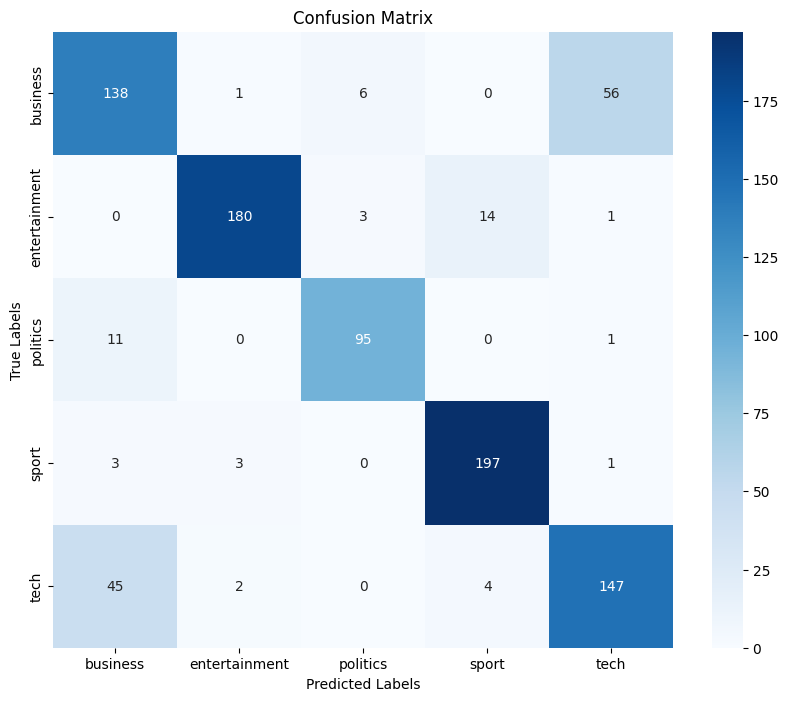

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define custom labels
labels = ['business',  'entertainment', 'politics','sport', 'tech']

# Make predictions
y_pred = model_simple_rnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_rnn.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_simple_rnn.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [35]:
from keras.layers import GRU
# Model
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GRU(64),  # GRU layer
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_gru.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_gru.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 150)          7500000   
_________________________________________________________________
gru (GRU)                    (None, 64)                41472     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 7,545,957
Trainable params: 7,545,957
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
57/57 [==============================] - 9s 42ms/step - loss: 1.4753 - accuracy: 0.3374 - val_loss: 1.1923 - val_accuracy: 0.6178
Epoch 2/20
57/57 [==============================] - 2s 29ms/step - loss: 0.7058 - accuracy: 0.81

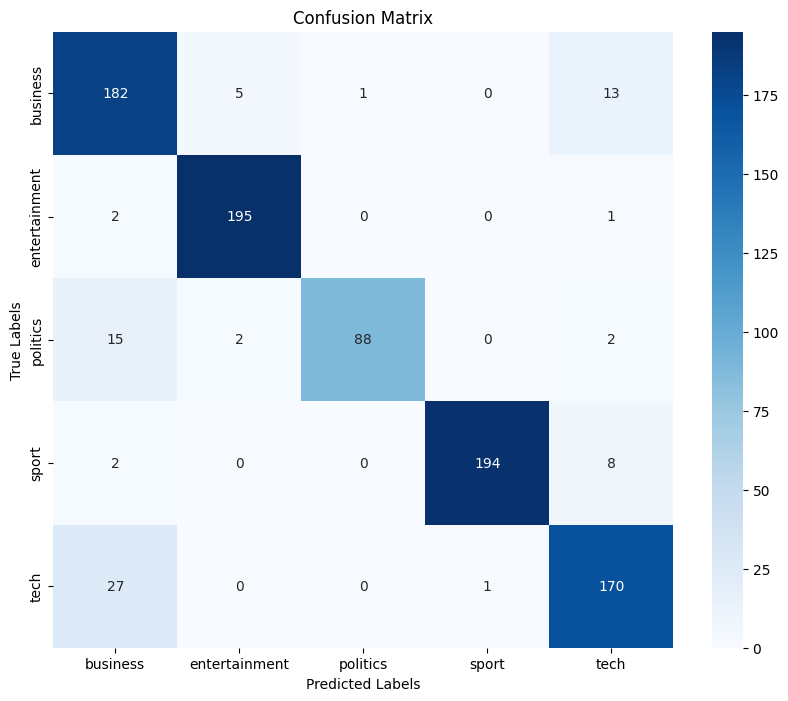

In [36]:
y_pred = model_gru.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_gru.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_gru.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [38]:
from tensorflow.keras.layers import LSTM

# Model
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(64),  # LSTM layer
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 150)          7500000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                55040     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 7,559,525
Trainable params: 7,559,525
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
57/57 [==============================] - 6s 49ms/step - loss: 1.3718 - accuracy: 0.3738 - val_loss: 1.1409 - val_accuracy: 0.5474
Epoch 2/20
57/57 [==============================] - 2s 33ms/step - loss: 0.8061 - accuracy: 0.75

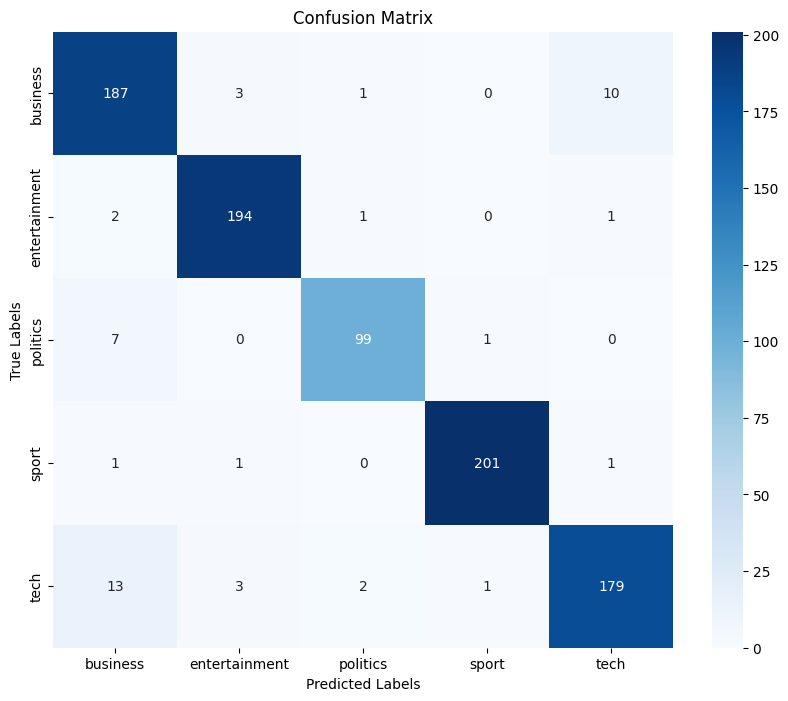

In [39]:
y_pred = model_lstm.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_lstm.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_lstm.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [41]:
# import re
 
# def clean_text(string):
#     if isinstance(string, str):
#         clean_text = re.sub(r'[\n,|।\'":]', '', string)
#         return clean_text
#     else:
#         return string # Return the input unchanged if it's not a string

# import snowballstemmer
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # Assuming 'nepali' has stop words list
# stop_words = set(stopwords.words('nepali'))  

# # Create an instance of the Stem class
# # stemmer = Stem()
# stemmer = snowballstemmer.NepaliStemmer()

# def tokenize_and_stem(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text)
#         tokens = [word for word in tokens if word not in stop_words]
#         stemmed = stemmer.stemWords(tokens)

#         return ' '.join(stemmed)
#     else:
#         return []

# # Applying the tokenization and stemming function to each element in DataFrame 'X'
# X = df['News'].apply(lambda x: tokenize_and_stem(x))

# tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
# tokenizer.fit_on_texts(X)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(X)
# max_length = max(len(seq) for seq in sequences)
# print('max_length: ', max_length)
# padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

In [124]:
text ='''काठमाडौँ, वैशाख २० गते । राष्ट्रपति रामचन्द्र पौडेलले सङ्घीय संसदको दुबै सदनको अधिवेशन आह्वान गर्नुभएको छ । राष्ट्रपति पौडेलले  वैशाख २८ गते शुक्रबार दिउँसो दुई बजे बस्ने गरी अधिवेशन आह्वान गर्नुभएको राष्ट्रपति कार्यालयद्वारा बिहीबार जारी विज्ञप्तिमा उल्लेख छ । “नेपालको संविधानको धारा ९३ (१) बमोजिम नेपाल सरकार मन्त्रिपरिषद्को वैशाख २० गते (आज) को सिफारिसमा वैशाख २८ गते शुक्रबारका दिन २ बजे अन्तर्राष्ट्रिय सम्मेलन केन्द्र नयाँ बानेश्वरमा सङ्घीय संसदको दुबै सदनको अधिवेशन आह्वान गर्नुभएको छ”,  राष्ट्रपति कार्यालयका प्रवक्ता शैलजा रेग्मी भट्टराईद्वारा हस्ताक्षरित विज्ञप्तिमा जनाइएको छ ।'''
text_df = pd.Series(text)

In [125]:
text_df=text_df.apply(clean_text)
X = text_df.apply(lambda x: tokenize_and_stem(x))

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in sequences)
print('max_length: ', max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

max_length:  75


In [126]:
prediction = model_simple_rnn.predict(padded_sequences)
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(prediction)
print(labels[np.argmax(prediction)])

[[1.6839598e-01 3.4402797e-03 8.0108386e-01 2.2508105e-04 2.6854765e-02]]
politics


In [127]:
prediction = model_gru.predict(padded_sequences)
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(prediction)
print(labels[np.argmax(prediction)])

[[0.045101   0.00213264 0.94929385 0.00168855 0.00178393]]
politics


In [128]:
prediction = model_lstm.predict(padded_sequences)
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(prediction)
print(labels[np.argmax(prediction)])

[[8.9023113e-03 1.8815232e-04 9.8987281e-01 3.5070881e-04 6.8608735e-04]]
politics


In [46]:
df.sample(2).values

array([['तेज विनायकको जितकोकाकोला अन्तरविद्यालय राष्ट्रिय छात्रछात्रा फुटबलअन्तर्गत छात्रतर्फको छनोट चरणमा आइतबार तेज विनायक उच्चमाविले जित हात पारेको छ  उसले गोल्डेन फ्युचर उच्चमाविलाई  ले पराजित गर्\u200dयो  तेज विनायकका लागि सुमन विक र सुदीप वाइवाले गोल गरेका थिए \tकोकाकोला अन्तरविद्यालय राष्ट्रिय छात्रछात्रा फुटबलअन्तर्गत छात्रतर्फको छनोट चरणमा आइतबार तेज विनायक उच्चमाविले जित हात पारेको छ  उसले गोल्डेन फ्युचर उच्चमाविलाई  ले पराजित गर्यो  तेज विनायकका लागि सुमन विक र सुदीप वाइवाले गोल गरेका थिए  \tअर्को खेलमा मनोहर उच्चमाविले श्री महांकाल जनजागृत माविलाई  ले पराजित गर्यो  मनोहरका लागि अमर तामाङले ह्याटि्रक गरेका थिए भने महांकालका लागि नवराज मैनालीले सान्त्वना गोल गरे  अर्को खेलमा सहयोगी माविले टंगाल माविलाई  ले हरायो  सहयोगीका लागि राजेन्द्र लामा र अशोक माटेले गोल गरे  डायमण्ड सेकेन्डरी स्कुलले विद्योदय इङलिस स्कुललाई  ले हरायो  विजयी टिमका रोशन ठकुरीले दुई गोल गरे भने अन्य गोल कुशल राई कृष्ण थापा र विश्वराज भण्डारीको नाममा रह्यो   \t ',
        'sport'],
       ['स्वाद फेर्ने प्र

In [47]:
# from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the GRU model
# gru_model = Sequential([
#     Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]),
#     GRU(64, return_sequences=True),
#     Dropout(0.5),
#     GRU(32),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(len(set(y)), activation='softmax')
# ])

# # Compile the model
# gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = gru_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = gru_model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')


In [48]:
# # Predict probabilities for each class
# y_pred_prob = gru_model.predict(X_test)

# # Get the class with the highest probability for each sample
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# class_names = ['business', 'politics', 'entertainment', 'tech', 'sport']

# # Plot the confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [49]:
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the LSTM model
# lstm_model = Sequential([
#     Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]),
#     Bidirectional(LSTM(64, return_sequences=True)),
#     Dropout(0.5),
#     Bidirectional(LSTM(32)),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(len(set(y)), activation='softmax')
# ])

# # Compile the model
# lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = lstm_model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')


In [50]:
# # Predict probabilities for each class
# y_pred_prob = lstm_model.predict(X_test)

# # Get the class with the highest probability for each sample
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# class_names = ['business', 'politics', 'entertainment', 'tech', 'sport']

# # Plot the confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [51]:
# import os
# from tensorflow.keras.models import load_model

# # Specify the file name for the model
# model_filename = 'my_model.h5'

# # Get the current working directory
# current_dir = os.getcwd()

# # Construct the full file path
# model_path = os.path.join(current_dir, model_filename)

# # Save the model
# model.save(model_path)

# print("Model saved successfully.")


In [52]:
# def clean_text(string):
#     if isinstance(string, str):
#         clean_text = re.sub(r'[\n,|।\'":]', '', string)
#         return clean_text
#     else:
#         return string  # Return the input unchanged if it's not a string


# import nltk
# from nltk.tokenize import word_tokenize
# from stem import Stem  # Import the Stem class from stem.py
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # Assuming 'nepali' has stop words list
# stop_words = set(stopwords.words('nepali'))  

# # Create an instance of the Stem class
# stemmer = Stem()

# def tokenize_and_stem(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text)
#         tokens = [word for word in tokens if word not in stop_words]
#         stemmed_tokens = stemmer.rootify(tokens)  # Use the rootify method of the Stem class
#         return stemmed_tokens
#     else:
#         return []

# # Applying the tokenization and stemming function to each element in DataFrame 'X'
# X = X.apply(lambda x: tokenize_and_stem(x))


# import numpy as np
# from keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Flatten the data to get a list of all words
# all_words = [word for sentence in X for word in sentence]

# # Count the frequency of each word
# word_counts = pd.Series(all_words).value_counts()

# # Assign ranks to the words based on their frequency
# word_ranks = word_counts.rank(ascending=False, method='min')

# # Create a dictionary to map words to their ranks
# word_rank_dict = dict(zip(word_counts.index, word_ranks))

# # Convert sentences to sequences of word indices
# word_indices = [[word_rank_dict[word] for word in sentence if word in word_rank_dict] for sentence in X]

# # Padding sequences to ensure they all have the same length
# max_length = max(len(seq) for seq in word_indices)
# padded_sequences = pad_sequences(word_indices, maxlen=max_length, padding='post', truncating='post')

# # Convert the list of lists to a numpy array
# X = np.array(padded_sequences)

In [53]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [54]:
# rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# # Compile and train the LSTM model
# lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# # Compile and train the GRU model
# gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

In [55]:
# from nepalitokenizers import WordPiece

# tokenizer = WordPiece()

# def tokenize_1(text):
#     tokens = tokenizer.encode(text)
#     return tokens.tokens

In [56]:
# tokens = X_train.apply(tokenize_1)
# print(tokens)

In [57]:
# X_train = tokens

In [58]:
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# # Define the TextVectorization layer
# vectorizer = TextVectorization(max_tokens=1000, output_mode='int')

# # Adapt the TextVectorization layer to your text data
# vectorizer.adapt(text_data)

# # Preprocess your input text data
# preprocessed_data = vectorizer(text_data)

# # Now you can feed the preprocessed_data into your model for prediction

In [59]:
# from nepali_stemmer.stemmer import NepStemmer
# nepstem = NepStemmer()

In [60]:
# y=df.Category

In [61]:
# X=df.News

In [62]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Category'], test_size=0.2, random_state=42)

In [63]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# print("Data type of y_train:", type(y_train))
# print("Data type of y_test:", type(y_test))


# print("Categories before label encoding in y_train:")
# print(set(y_train))

# print("Categories before label encoding in y_train:")
# print(set(y_test))

# # Encode the categorical labels into numerical format
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# print("Categories after label encoding in y_test:")
# print(set(y_train_encoded))

# print("Categories after label encoding in y_test:")
# print(set(y_test_encoded))

# print("Data type of y_train:", type(y_train))
# print("Data type of y_test:", type(y_test))

# print("Unique values in y_train_encoded:", set(y_train_encoded))
# print("Unique values in y_test_encoded:", set(y_test_encoded))


In [64]:
# import re
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Define a regex pattern to preserve Devanagari characters
# devanagari_pattern = re.compile(r'[^a-zA-Z\s\u0900-\u097F]')  # Unicode range for Devanagari characters

# # Remove special characters and lowercasing while preserving Devanagari characters
# df['News'] = df['News'].apply(lambda x: devanagari_pattern.sub('', x.lower()))

# # Tokenization
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['News'])
# word_index = tokenizer.word_index
# print("Number of unique tokens:", len(word_index))

# # Padding sequences
# max_length = 100  # Adjust as needed based on the length distribution analysis
# sequences = tokenizer.texts_to_sequences(df['News'])
# padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [65]:
# import numpy as np
# from nltk.tokenize import word_tokenize
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# sequences = tokenizer.texts_to_sequences(X_train)
# # Pad sequences to ensure uniform length
# max_sequence_length = max(len(seq) for seq in sequences)
# padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [66]:
item_list=['''नेप्से परिसूचक र कारोबार रकम दुबै घट्यो
कान्तिपुर संवाददाता
साप्ताहिक कारोबारको अन्तिम दिन बिहीबार नेप्से परिसूचक ७.३१ अंकले घटेर १ हजार ९ सय ९८.९६ अंकमा बन्द भएको छ । ''']
for item in item_list:
    # Clean text
    text_df = pd.Series(item)
    text_df = text_df.apply(clean_text)
    X = text_df.apply(lambda x: tokenize_and_stem(x))

    sequences = tokenizer.texts_to_sequences(X)
    padded_sequences = pad_sequences(sequences, maxlen=max_length)

    prediction_rnn = np.argmax(model_simple_rnn.predict(padded_sequences))
    labels = ['business',  'entertainment', 'politics', 'sport', 'tech']
    predicted_label_rnn = labels[prediction_rnn]

    prediction_gru = np.argmax(model_gru.predict(padded_sequences))
    predicted_label_gru = labels[prediction_gru]

    prediction_lstm = np.argmax(model_lstm.predict(padded_sequences))
    predicted_label_lstm = labels[prediction_lstm]
    print(predicted_label_rnn)
    print(predicted_label_gru)
    print(predicted_label_lstm)

sport
business
politics


In [67]:
from tensorflow.keras.models import load_model

In [68]:
model_rnn = load_model('model_rnn.h5')
model_lstm = load_model('model_lstm.h5')
model_gru = load_model('model_gru.h5')

In [69]:
from fastapi import FastAPI, Body
import uvicorn
from pyngrok import ngrok
from typing import List

In [70]:
ngrok.set_auth_token("2fwj36StRRzVYL8HLKVsBLON4jw_3nNsrbKcPd5ELRBXfYcva")

In [71]:
app = FastAPI()

@app.get("/")
def hello():
    return {'message': 'Hello'}

@app.post("/predict/")
async def predict_item(item_list: List[str]):
    for item in item_list:
    # Clean text
        text_df = pd.Series(item)
        text_df = text_df.apply(clean_text)
        X = text_df.apply(lambda x: tokenize_and_stem(x))

        sequences = tokenizer.texts_to_sequences(X)
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        prediction_rnn = np.argmax(model_rnn.predict(padded_sequences))
        labels = ['business',  'entertainment', 'politics', 'sport', 'tech']
        predicted_label_rnn = labels[prediction_rnn]

        prediction_gru = np.argmax(model_gru.predict(padded_sequences))
        predicted_label_gru = labels[prediction_gru]

        prediction_lstm = np.argmax(model_lstm.predict(padded_sequences))
        predicted_label_lstm = labels[prediction_lstm]

        
        return {"predicted_label_rnn": predicted_label_rnn,
                "predicted_label_gru": predicted_label_gru,
                "predicted_label_lstm": predicted_label_lstm
                }

In [72]:
# Run FastAPI app using Uvicorn with Ngrok
import nest_asyncio
import uvicorn

# Run FastAPI app
def run_app():
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Start Ngrok tunnel
def start_ngrok():
    ngrok_tunnel = ngrok.connect(8000)
    print("Public URL:", ngrok_tunnel.public_url)
    return ngrok_tunnel

if __name__ == "__main__":
    tunnel = start_ngrok()
    run_app()

Public URL: https://9674-110-44-123-197.ngrok-free.app


INFO:     Started server process [4668]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [4668]


KeyboardInterrupt: 

In [ ]:
ngrok.kill()

In [ ]:
!pip install python-multipart